# Notebook for Analysis and Annotations
## Exploring the Power of Female American Political Speeches in the 20th Century
Female American political speeches of the 20th century have played a crucial role in shaping political discourse, challenging gender norms, and contributing to gender equality. This research aims to analyze and explore the most significant speeches by female political figures during this era.

What are the key semantic features present in these speeches?
What were the popular political topics during the 20th century?
How did these speeches by females contribute to shaping political discourse?
What role did these speeches play in advancing women's rights and influencing societal change?

## Installing, Importing and Preprocessing spaCy

In [97]:
# Install and import spacy and plotly.
!pip install spaCy
!pip install plotly
!pip install nbformat==5.1.2

In [98]:
# Import spacy
import spacy

# Install English language model
!spacy download en_core_web_sm

# Import os to upload documents and metadata
import os

# Load spaCy visualizer
from spacy import displacy

from spacy.matcher import Matcher

# Import pandas DataFrame packages
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# Import graphing package
import plotly.graph_objects as go
import plotly.express as px

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 14.6 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [99]:
# Load nlp pipeline
nlp = spacy.load('en_core_web_sm')

# Check what functions it performs
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


## Importing necessary libraries

In [100]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime
from urllib.parse import urljoin
import re
import string
import nltk
import string 
from collections import Counter
import nltk
import string 
from nltk.corpus import stopwords
import csv

In [101]:
# display all columns
pd.set_option('display.max_columns', None)

## Load metadata

In [102]:
women_speech = pd.read_csv('women_speech.csv')

In [103]:
women_speech

,Title,Speaker,Year,Transcript
0,1976 Democratic National Convention Keynote Ad...,Barbara Charline Jordan,1976,Thank you ladies and gentlemen for a very warm...
1,Statement on House Judiciary Proceedings to Im...,Barbara Charline Jordan,1974,"Thank you, Mr. Chairman. Mr. Chairman, I join ..."
2,The Fundamental Principle of a Republic,Anna Howard Shaw,1915,"When I came into your hall tonight, I thought ..."
3,United Nations 4th World Conference Speech Wo...,Hillary Rodham Clinton,1995,"Thank you very much, Gertrude Mongella, for yo..."
4,Democratic National Convention Keynote Address,Ann Richards,1988,"Thank you, very much. Good evening, ladies and..."
5,Declaration of Conscience,Margaret Chase Smith,1950,r. President: I would like to speak briefly an...
6,Wellesley College Commencement Speech,Barbara Pierce Bush,1990,"Thank you very, very much,President Keohane. M..."
7,1992 Republican National Convention Address A...,MaryFisher,1992,Less than three months ago at platform hearing...
8,The Struggle for Human Rights,Eleanor Roosevelt,1948,I have come this evening to talk with you on o...
9,1984 Vice Presidential Nomination Acceptance A...,Geraldine Ferraro,1984,Ladies and gentlemen of the convention: My nam...


## Clean the data

In [104]:
# We define a function to remove non-alphanumeric characters, newlines, carriage returns, and multiple consecutive spaces.
def clean_text(text):
    # Remove non-alphanumeric characters
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Remove newlines and carriage returns
    cleaned_text = cleaned_text.replace('\n', '').replace('\r', '')
    # Remove multiple consecutive spaces
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    return cleaned_text
# Then, we apply the cleaning function to a DataFrame column (Transcript)
women_speech['clean_transcript'] = women_speech['Transcript'].apply(clean_text)

## Runs the nlp pipeline

In [105]:
# Define a function that runs the nlp pipeline on any given input text
def process_text(text):
    return nlp(text)

In [106]:
# Apply the function to the "Transcript" column, so that the nlp pipeline is called on each speech
women_speech['Doc'] = women_speech['clean_transcript'].apply(process_text)

## Text reduction - Tokenization

In [107]:
# Define a function to retrieve tokens from a doc object
def get_token(doc):
    return [(token.text) for token in doc]

In [108]:
# Run the token retrieval function on the doc objects in the dataframe
women_speech['Tokens'] = women_speech['Doc'].apply(get_token)
women_speech.head(1)

,Title,Speaker,Year,Transcript,clean_transcript,Doc,Tokens
0,1976 Democratic National Convention Keynote Ad...,Barbara Charline Jordan,1976,Thank you ladies and gentlemen for a very warm...,Thank you ladies and gentlemen for a very warm...,"(Thank, you, ladies, and, gentlemen, for, a, v...","[Thank, you, ladies, and, gentlemen, for, a, v..."


## Text reduction - Lemmatization

In [109]:
# Define a function to retrieve lemmas from a doc object
def get_lemma(doc):
    return [(token.lemma_) for token in doc]

# Run the lemma retrieval function on the doc objects in the dataframe
women_speech['Lemmas'] = women_speech['Doc'].apply(get_lemma)
women_speech.head(1)

,Title,Speaker,Year,Transcript,clean_transcript,Doc,Tokens,Lemmas
0,1976 Democratic National Convention Keynote Ad...,Barbara Charline Jordan,1976,Thank you ladies and gentlemen for a very warm...,Thank you ladies and gentlemen for a very warm...,"(Thank, you, ladies, and, gentlemen, for, a, v...","[Thank, you, ladies, and, gentlemen, for, a, v...","[thank, you, lady, and, gentleman, for, a, ver..."


### ❓ What are the most frequent words used in female American political speeches of the 20th century? How do these words reflect the emphasis on gender equality?

In [110]:
# download NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
# Get the English stop words
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chengluotong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [111]:
# Combine all lemmas into a single list and remove stop words
all_lemmas = [lemma for lemmas in women_speech['Lemmas'] for lemma in lemmas if lemma.lower() not in stop_words and lemma not in string.punctuation and not lemma.isspace()]

# clean punctuation in all_lemmas
# Function to clean punctuation from lemmas and remove empty strings
def clean_punctuation(lemmas):
    cleaned_lemmas = []
    for lemma in lemmas:
        # Remove punctuation using regular expression
        cleaned_lemma = re.sub(r'[^\w\s]', '', lemma)
        if cleaned_lemma:  # Check if the cleaned lemma is not an empty string
            cleaned_lemmas.append(cleaned_lemma)
    return cleaned_lemmas

# Clean the punctuation from all_lemmas and remove empty strings
cleaned_lemmas = clean_punctuation(all_lemmas)


# Calculate word frequencies
word_freq = Counter(cleaned_lemmas)

# Get the most frequent words
most_common_words = word_freq.most_common(20)  # Change the number to get more or fewer words

# Print the most frequent words
for word, freq in most_common_words:
    print(f"{word}: {freq}")

woman: 372
man: 263
would: 223
people: 216
right: 182
say: 177
one: 165
know: 139
go: 135
make: 134
time: 126
world: 122
must: 116
work: 115
human: 113
country: 111
vote: 111
great: 110
come: 109
year: 105


The most frequent words in these speeches are related to gender, political and social issues, activism, and advocacy. Words like "woman," "man," "rights," "vote," and "country" suggests an emphasis on gender equality and civil rights. These speeches might address the challenges and aspirations of the 20th-century women in the political sphere.

## Text annotation - Part of Speech Tagging (POS)

In [112]:
# Define a function to extract the coarse- and fine-grained part-of-speech (POS) tags for each token in the "doc" object
def get_pos(doc):
    return [(token.pos_, token.tag_) for token in doc]

women_speech['POS'] = women_speech['Doc'].apply(get_pos)

In [113]:
women_speech.head(1)

,Title,Speaker,Year,Transcript,clean_transcript,Doc,Tokens,Lemmas,POS
0,1976 Democratic National Convention Keynote Ad...,Barbara Charline Jordan,1976,Thank you ladies and gentlemen for a very warm...,Thank you ladies and gentlemen for a very warm...,"(Thank, you, ladies, and, gentlemen, for, a, v...","[Thank, you, ladies, and, gentlemen, for, a, v...","[thank, you, lady, and, gentleman, for, a, ver...","[(VERB, VBP), (PRON, PRP), (NOUN, NNS), (CCONJ..."


### Extract proper nouns

In [114]:
# Define function to extract proper nouns from Doc object
def extract_proper_nouns(doc):
    return [token.text for token in doc if token.pos_ == 'PROPN']

# Apply function to Doc column and store resulting proper nouns in new column
women_speech['Proper_Nouns'] = women_speech['Doc'].apply(extract_proper_nouns)

In [115]:
women_speech["POS"]

0     [(VERB, VBP), (PRON, PRP), (NOUN, NNS), (CCONJ...
1     [(VERB, VBP), (PRON, PRP), (PROPN, NNP), (PROP...
2     [(SCONJ, WRB), (PRON, PRP), (VERB, VBD), (ADP,...
3     [(VERB, VBP), (PRON, PRP), (ADV, RB), (ADV, RB...
4     [(VERB, VBP), (PRON, PRP), (ADV, RB), (ADV, RB...
5     [(NOUN, NN), (PROPN, NNP), (PRON, PRP), (AUX, ...
6     [(VERB, VBP), (PRON, PRP), (ADV, RB), (ADV, RB...
7     [(ADJ, JJR), (ADP, IN), (NUM, CD), (NOUN, NNS)...
8     [(PRON, PRP), (AUX, VBP), (VERB, VBN), (DET, D...
9     [(NOUN, NNS), (CCONJ, CC), (NOUN, NNS), (ADP, ...
10    [(NOUN, NNS), (ADP, IN), (DET, DT), (PROPN, NN...
11    [(PRON, PRP), (AUX, VBP), (VERB, VBN), (ADP, I...
12    [(PROPN, NNP), (PROPN, NNP), (PROPN, NNP), (PR...
13    [(NOUN, NN), (NOUN, NN), (AUX, VBZ), (ADJ, JJ)...
14    [(PRON, PRP), (VERB, VBP), (PROPN, NNP), (PROP...
15    [(PROPN, NNP), (PROPN, NNP), (PROPN, NNPS), (C...
16    [(PRON, PRP), (VERB, VBP), (PART, TO), (VERB, ...
17    [(PRON, PRP$), (PROPN, NNP), (NOUN, NNS), 

### ❓ What is the most frequently mentioned proper nouns across all the speeches by different female speakers in the 20th century?

In [116]:
# Concatenate all proper nouns into a single Series
all_proper_nouns = pd.Series([noun for sublist in women_speech['Proper_Nouns'] for noun in sublist])

# Count the frequency of each proper noun
frequency = all_proper_nouns.value_counts()

# Sort the frequencies in descending order
most_frequent_proper_nouns = frequency.sort_values(ascending=False)

# top 15 frequently mentioned proper nouns 
most_frequent_proper_nouns.head(15)

Party           67
America         67
United          56
President       50
States          42
Communist       35
Mr              35
Declaration     34
Republic        33
Rights          31
New             28
Americans       26
Government      25
Thomas          23
Constitution    21
Name: count, dtype: int64

The most frequently mentioned proper nouns across all the speeches shows that these speeches cover topics such as American society, politics, and ideologies. For instance, the mention of "Party" perhaps indicates that these speeches concerned political party ideologies such as Communist Party, and women's involvement in political parties. The mention of "Government" and "Declaration" implies that the speeches may discuss women's contributions to government policies, and the principles in the Declaration of Independence. "Rights" and "Constitution" indicate that the speeches likely address women's rights, gender equality, and civil liberties. "New" is mentioned frequently, which could suggest discussions about new ideas or developments during the 20th century.

### ❓ What is the most frequently mentioned nouns in the 20th-century speeches by women?

In [117]:
# Define function to extract nouns from Doc object
def extract_proper_nouns(doc):
    return [token.text for token in doc if token.pos_ == 'NOUN']

# Apply function to Doc column and store resulting nouns in new column
women_speech['NOUN'] = women_speech['Doc'].apply(extract_proper_nouns)

# Concatenate all nouns into a single Series
all_proper_nouns = pd.Series([noun for sublist in women_speech['NOUN'] for noun in sublist])

# Count the frequency of each noun
frequency = all_proper_nouns.value_counts()

# Sort the frequencies in descending order
most_frequent_proper_nouns = frequency.sort_values(ascending=False)

# top 15 frequently mentioned nouns 
most_frequent_proper_nouns.head(15)

women         292
people        201
men           166
time          110
world         110
country        93
man            90
rights         88
years          86
children       81
government     79
life           73
woman          69
right          63
war            57
Name: count, dtype: int64

Words like "women," "men," "right," "children,"war" suggest that the speeches likely focus on women's issues, gender dynamics, human rights, historical contexts, global perspectives, national contexts, governance, personal experiences, and the impact of war on society. The speeches may also touch upon topics such as children's welfare, individual liberties, and the pursuit of fairness and equality.

### ❓ What is the most frequently mentioned adjectives in the 20th-century speeches by women?

In [118]:
# Define function to extract proper nouns from Doc object
def extract_proper_nouns(doc):
    return [token.text for token in doc if token.pos_ == 'ADJ']

# Apply function to Doc column and store resulting proper nouns in new column
women_speech['Adjectives'] = women_speech['Doc'].apply(extract_proper_nouns)

# Concatenate all proper nouns into a single Series
all_proper_nouns = pd.Series([adj for sublist in women_speech['Adjectives'] for adj in sublist])

# Count the frequency of each proper noun
frequency = all_proper_nouns.value_counts()

# Sort the frequencies in descending order
most_frequent_proper_nouns = frequency.sort_values(ascending=False)

# top 15 frequently mentioned proper nouns 
most_frequent_proper_nouns.head(15)

human        106
other         91
great         84
political     73
own           64
American      64
many          51
new           50
public        47
more          42
first         39
same          38
good          37
social        35
free          35
Name: count, dtype: int64

"Human" perhaps suggests that the speeches focus on the universal experiences and rights of all individuals, emphasizing the shared humanity among people. "Political" might suggest that the speeches address matters related to governance, policies, and power dynamics, emphasizing the political nature of the issues being discussed. "Own" perhaps implies personal responsibility and agency, suggesting that the speeches emphasize individual empowerment and the importance of taking ownership of one's actions and choices. "Public" might indicate that the speeches emphasize the involvement and participation of the general public in the issues being discussed, highlighting the importance of a collective effort.
"Free" may reveals a strong emphasis on personal liberty, autonomy, and the removal of barriers or constraints.

### ❓ How does the frequency of proper nouns vary across different speakers?

In [119]:
# Group the speeches by speakers and count the occurrence of each Proper Noun
grouped_speeches3 = women_speech.groupby('Speaker')['Proper_Nouns'].sum().apply(pd.Series).stack().reset_index(level=1, drop=True).reset_index(name='Proper_Nouns_counts')

# Calculate the frequency of each word for each speaker
word_frequency3 = grouped_speeches3.groupby(['Speaker', 'Proper_Nouns_counts']).size().reset_index(name='Frequency')

# Sort the word frequencies in descending order for each speaker
word_frequency3 = word_frequency3.sort_values(['Speaker', 'Frequency'], ascending=[True, False])

# Get the most frequently mentioned word for each speaker
most_frequent_words3 = word_frequency3.groupby('Speaker').first().reset_index()

most_frequent_words3

,Speaker,Proper_Nouns_counts,Frequency
0,Anita Hill,Thomas,20
1,Ann Richards,America,16
2,Anna Howard Shaw,Republic,28
3,Barbara Charline Jordan,President,28
4,Barbara Pierce Bush,Wellesley,6
5,Carrie Chapman Catt,American,6
6,Eleanor Roosevelt,Declaration,27
7,Elizabeth Glaser,America,13
8,Elizabeth Gurley Flynn,Party,46
9,Emma Goldman,Attorney,15


In [120]:
grouped_speeches3 = women_speech.groupby('Speaker')['Adjectives'].sum().apply(pd.Series).stack().reset_index(level=1, drop=True).reset_index(name='Proper_Noun_Count')


"America" and "State" were frequently mentioned by many speakers (Ann Richards, Elizabeth Glaser, etc.), indicating a common focus on the country and perhpas their participation in American politics. Barbara Jordan mentioned "President" frequently, suggesting a focus on the presidency. Elizabeth Flynn frequently mentioned "Party," indicating a focus on political parties. Mary Fisher mentioned "AIDS" multiple times, indicating a focus on health issue.

### ❓ How does the frequency of proper nouns vary over time?

In [121]:
# Group the speeches by decade and count the occurrence of each proper noun
grouped_speeches2 = women_speech.groupby('Year')['Proper_Nouns'].sum().apply(pd.Series).stack().reset_index(level=1, drop=True).reset_index(name='Proper_Noun_Count')

# Calculate the frequency of each word for each decade
word_frequency2 = grouped_speeches2.groupby(['Year', 'Proper_Noun_Count']).size().reset_index(name='Frequency')

# Sort the word frequencies in descending order for each decade
word_frequency2 = word_frequency2.sort_values(['Year', 'Frequency'], ascending=[True, False])

# Get the most frequently mentioned word for each decade
most_frequent_words2 = word_frequency2.groupby('Year').first().reset_index()

# Print the top 10 most frequently mentioned words for each decade
most_frequent_words2

,Year,Proper_Noun_Count,Frequency
0,1915,Republic,28
1,1916,Hour,6
2,1917,Attorney,15
3,1925,Childrens,5
4,1948,Declaration,27
5,1950,Senate,13
6,1952,Party,46
7,1970,State,11
8,1974,President,26
9,1976,America,8


In [122]:
# Create a new column 'Decade' based on the 'Year' column
women_speech['Decade'] = women_speech['Year'] // 10 * 10

# Group the speeches by decade and count the occurrence of each proper noun
grouped_speeches2 = women_speech.groupby('Decade')['Proper_Nouns'].sum().apply(pd.Series).stack().reset_index(level=1, drop=True).reset_index(name='Proper_Noun_Count')

# Calculate the frequency of each word for each decade
word_frequency2 = grouped_speeches2.groupby(['Decade', 'Proper_Noun_Count']).size().reset_index(name='Frequency')

# Sort the word frequencies in descending order for each decade
word_frequency2 = word_frequency2.sort_values(['Decade', 'Frequency'], ascending=[True, False])

# Get the most frequently mentioned word for each decade
most_frequent_words2 = word_frequency2.groupby('Decade').first().reset_index()

# Print the top 10 most frequently mentioned words for each decade
most_frequent_words2.head(10)


,Decade,Proper_Noun_Count,Frequency
0,1910,Republic,30
1,1920,Childrens,5
2,1940,Declaration,27
3,1950,Party,57
4,1970,President,28
5,1980,America,28
6,1990,Thomas,20


In the 1910s, "Republic" was the most commonly mentioned. This suggests that during this time, women were likely advocating for the principles and ideals associated with a republic, such as democracy and individual rights. Moving forward to the 1940s, "Declaration" was mentioned most frequently. This could indicate that women were focusing on the Declaration of Independence, which outlines fundamental rights and principles of the United States. In the 1950s, "Party" was mentioned most. This might suggest that women were actively involved in political parties and were discussing party-related matters. In the 1980s, the keyword "American" was mentioned most frequently. This could imply that women were emphasizing their American identity. It is possible that women were discussing issues related to national identity, patriotism, or advocating for specific policies that they believed aligned with American values.

### ❓ How does the frequency of nouns vary over time?

In [123]:
# Group the speeches by decade and count the occurrence of each noun
grouped_speeches2 = women_speech.groupby('Decade')['NOUN'].sum().apply(pd.Series).stack().reset_index(level=1, drop=True).reset_index(name='Noun_Count')

# Calculate the frequency of each word for each decade
word_frequency2 = grouped_speeches2.groupby(['Decade', 'Noun_Count']).size().reset_index(name='Frequency')

# Sort the word frequencies in descending order for each decade
word_frequency2 = word_frequency2.sort_values(['Decade', 'Frequency'], ascending=[True, False])

# Get the most frequently mentioned word for each decade
most_frequent_words2 = word_frequency2.groupby('Decade').first().reset_index()

# Print the top 10 most frequently mentioned words for each decade
most_frequent_words2.head(10)

,Decade,Noun_Count,Frequency
0,1910,women,165
1,1920,children,20
2,1940,rights,44
3,1950,people,48
4,1970,people,27
5,1980,country,21
6,1990,women,60


These results suggest that the focus of women's speeches varied across different decades. In the early 20th century (1910), the emphasis was on women's rights and empowerment. In the 1920s, there was a focus on children's issues. In the 1940s, women's rights remained a prominent topic. In the 1950s and 1970s, the speeches highlighted broader societal issues and the rights and well-being of people in general. The 1980s saw a focus on the nation and country-related topics. Finally, in the 1990s, women's rights and empowerment regained attention.

In [124]:
# Delete the 'Decade' column after analyzing
women_speech = women_speech.drop('Decade', axis=1)

## Analyzing the distribution of POS in each speech

In [125]:
# Create new DataFrame for analysis purposes
pos_analysis_df = women_speech[['Title','Speaker', 'Doc']]

# Create list to store each dictionary
num_list = []

# Define a function to get part of speech tags and counts and append them to a new dictionary
def get_pos_tags(doc):
    dictionary = {}
    num_pos = doc.count_by(spacy.attrs.POS)
    for k,v in sorted(num_pos.items()):
        dictionary[doc.vocab[k].text] = v
    num_list.append(dictionary)

# Apply function to each doc object in DataFrame
pos_analysis_df.loc['C_POS'] = pos_analysis_df['Doc'].apply(get_pos_tags)

# Create new dataframe with part of speech counts
pos_counts = pd.DataFrame(num_list)
columns = list(pos_counts.columns)

# Add speaker of each speech as new column to dataframe
idx = 0
new_col = pos_analysis_df['Speaker']
pos_counts.insert(loc=idx, column='Speaker', value=new_col)

In [126]:
# Get average part of speech counts used in speech of each speaker
average_pos_df = pos_counts.groupby(['Speaker']).mean()

# Round calculations to the nearest whole number
average_pos_df = average_pos_df.round(0)

# Reset index to improve DataFrame readability
average_pos_df = average_pos_df.reset_index()

# Show dataframe
average_pos_df

,Speaker,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,SCONJ,VERB,PUNCT,X
0,Anita Hill,145.0,345.0,99.0,158.0,81.0,215.0,2.0,396.0,31.0,67.0,372.0,159.0,79.0,309.0,NaN,NaN
1,Ann Richards,158.0,245.0,104.0,217.0,157.0,215.0,8.0,458.0,19.0,101.0,438.0,129.0,107.0,411.0,NaN,NaN
2,Anna Howard Shaw,501.0,991.0,448.0,796.0,480.0,1036.0,12.0,1660.0,70.0,352.0,1287.0,244.0,422.0,1252.0,NaN,NaN
3,Barbara Charline Jordan,110.0,166.0,48.0,144.0,52.0,212.0,2.0,307.0,12.0,61.0,182.0,106.0,60.0,218.0,NaN,NaN
4,Barbara Pierce Bush,77.0,106.0,62.0,95.0,54.0,98.0,3.0,208.0,14.0,40.0,159.0,56.0,26.0,158.0,1.0,NaN
5,Carrie Chapman Catt,255.0,436.0,128.0,275.0,152.0,396.0,1.0,782.0,29.0,78.0,322.0,131.0,89.0,420.0,NaN,NaN
6,Eleanor Roosevelt,222.0,376.0,86.0,172.0,101.0,322.0,1.0,576.0,17.0,80.0,233.0,144.0,58.0,272.0,NaN,NaN
7,Elizabeth Glaser,46.0,93.0,46.0,87.0,48.0,81.0,1.0,184.0,10.0,58.0,174.0,65.0,41.0,160.0,1.0,NaN
8,Elizabeth Gurley Flynn,526.0,998.0,271.0,488.0,329.0,765.0,6.0,1575.0,95.0,195.0,866.0,640.0,190.0,891.0,1.0,2.0
9,Emma Goldman,319.0,602.0,199.0,409.0,214.0,554.0,5.0,968.0,33.0,185.0,568.0,244.0,181.0,578.0,NaN,NaN


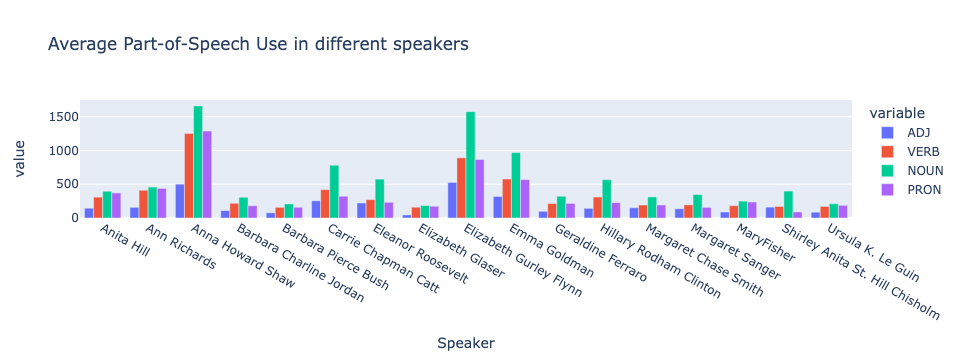

In [127]:
# Use plotly to plot POS use per speaker
fig = px.bar(average_pos_df, x="Speaker", y=["ADJ", 'VERB', "NOUN", "PRON"], title="Average Part-of-Speech Use in different speakers", barmode='group')
fig.show()

Using percentages of POS instead of counts can provide a more accurate representation of the distribution of POS in different speech, especially when analyzing texts of varying lengths. Percentages take into account the total number of words in a given text, which allows for a more meaningful comparison across texts of different lengths.

In [128]:
# Define a function to get part-of-speech tags and counts and append them to a new dictionary
def get_pos_tags(doc):
    dictionary = {}
    num_pos = doc.count_by(spacy.attrs.POS)
    total_count = sum(num_pos.values())  # Calculate total count of POS tags
    for k, v in sorted(num_pos.items()):
        dictionary[doc.vocab[k].text] = (v / total_count) * 100  # Calculate percentage
    return dictionary

# Convert float values in 'Doc' column to strings
pos_analysis_df['Doc'] = pos_analysis_df['Doc'].astype(str)

# Apply the function to each doc object in DataFrame
pos_analysis_df['POS_Counts'] = pos_analysis_df['Doc'].apply(lambda doc: get_pos_tags(nlp(doc)))

# Create a new dataframe with part-of-speech counts
pos_counts = pd.DataFrame(pos_analysis_df['POS_Counts'].tolist())

# Add the 'Topic' column to the dataframe from pos_analysis_df
pos_counts['Speaker'] = pos_analysis_df['Speaker']

# Get the average POS counts used in each speech
average_pos_df = pos_counts.groupby('Speaker').mean().round(2)

# Reset index to improve DataFrame readability
average_pos_df = average_pos_df.reset_index()

average_pos_df

,Speaker,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,SCONJ,VERB,PUNCT,X
0,Anita Hill,5.90,14.04,4.03,6.43,3.30,8.75,0.08,16.11,1.26,2.73,15.13,6.47,3.21,12.57,NaN,NaN
1,Ann Richards,5.71,8.85,3.76,7.84,5.67,7.77,0.29,16.55,0.69,3.65,15.83,4.66,3.87,14.85,NaN,NaN
2,Anna Howard Shaw,5.25,10.38,4.69,8.33,5.03,10.85,0.13,17.38,0.73,3.69,13.48,2.55,4.42,13.11,NaN,NaN
3,Barbara Charline Jordan,6.48,9.95,2.84,8.55,3.08,12.71,0.11,18.31,0.71,3.62,10.67,6.57,3.55,12.92,NaN,NaN
4,Barbara Pierce Bush,6.66,9.16,5.36,8.21,4.67,8.47,0.26,17.98,1.21,3.46,13.74,4.84,2.25,13.66,0.09,NaN
5,Carrie Chapman Catt,7.17,12.67,3.75,7.39,4.10,11.33,0.02,22.73,0.90,2.35,9.64,3.78,2.47,11.70,NaN,NaN
6,Eleanor Roosevelt,8.56,14.48,3.40,6.20,3.80,12.30,0.05,21.39,0.77,2.96,8.39,5.64,2.16,9.90,NaN,NaN
7,Elizabeth Glaser,4.20,8.49,4.20,7.95,4.38,7.40,0.09,16.80,0.91,5.30,15.89,5.94,3.74,14.61,0.09,NaN
8,Elizabeth Gurley Flynn,6.71,12.73,3.46,6.23,4.20,9.76,0.08,20.09,1.21,2.49,11.05,8.17,2.42,11.37,0.01,0.03
9,Emma Goldman,6.31,11.90,3.93,8.08,4.23,10.95,0.10,19.13,0.65,3.66,11.23,4.82,3.58,11.43,NaN,NaN


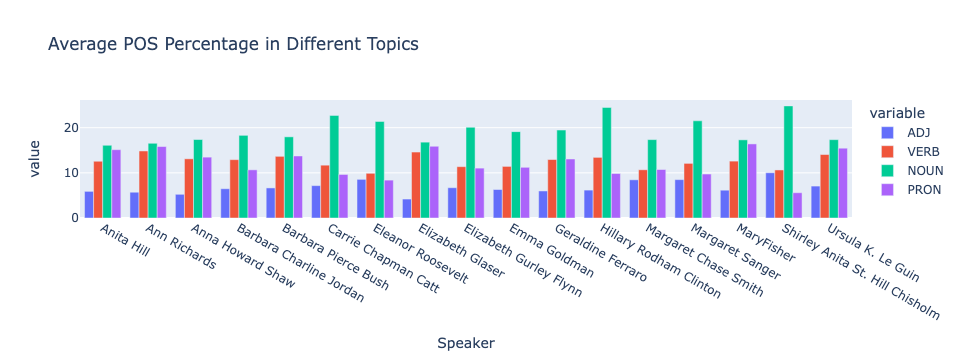

In [129]:
# Use plotly to plot POS use per speaker
fig = px.bar(average_pos_df, x="Speaker", y=["ADJ", 'VERB', "NOUN", "PRON"], title="Average POS Percentage in Different Topics", barmode='group')
fig.show()

The results show that the percentage of nouns is higher than that of adjectives, verbs, and pronouns. Different speakers have varying frequencies of different parts of speech in their speeches. Speeches by Hillary Rodham Clinton, Shirley Anita St. Hill Chisholm, and Eleanor Roosevelt have a much higher percentage of nouns. As nouns are often used to convey information, it is possible that these speakers prioritize conveying concrete information and facts in their speeches, which could be a characteristic of their speaking style or rhetorical approach.

On the other hand, Ann Richards, Elizabeth Glaser, and Ursula K. Le Guin used relatively similar numbers of verbs, nouns, and pronouns. This suggests a more balanced distribution of these parts of speech in their speeches. It indicates that these speakers may employ a more diverse range of linguistic elements in their communication.

## Text annotation - Named Entity Recognition

In [130]:
# Get all NE labels and assign to variable
labels = nlp.get_pipe("ner").labels

# Print each label and its description
for label in labels:
    print(label + ' : ' + spacy.explain(label))

CARDINAL : Numerals that do not fall under another type
DATE : Absolute or relative dates or periods
EVENT : Named hurricanes, battles, wars, sports events, etc.
FAC : Buildings, airports, highways, bridges, etc.
GPE : Countries, cities, states
LANGUAGE : Any named language
LAW : Named documents made into laws.
LOC : Non-GPE locations, mountain ranges, bodies of water
MONEY : Monetary values, including unit
NORP : Nationalities or religious or political groups
ORDINAL : "first", "second", etc.
ORG : Companies, agencies, institutions, etc.
PERCENT : Percentage, including "%"
PERSON : People, including fictional
PRODUCT : Objects, vehicles, foods, etc. (not services)
QUANTITY : Measurements, as of weight or distance
TIME : Times smaller than a day
WORK_OF_ART : Titles of books, songs, etc.


In [131]:
# Define function to extract named entities from doc objects
def extract_named_entities(doc):
    return [ent.label_ for ent in doc.ents]

# Apply function to Doc column and store resulting named entities in new column
women_speech['Named_Entities'] = women_speech['Doc'].apply(extract_named_entities)
women_speech.head()

,Title,Speaker,Year,Transcript,clean_transcript,Doc,Tokens,Lemmas,POS,Proper_Nouns,NOUN,Adjectives,Named_Entities
0,1976 Democratic National Convention Keynote Ad...,Barbara Charline Jordan,1976,Thank you ladies and gentlemen for a very warm...,Thank you ladies and gentlemen for a very warm...,"(Thank, you, ladies, and, gentlemen, for, a, v...","[Thank, you, ladies, and, gentlemen, for, a, v...","[thank, you, lady, and, gentleman, for, a, ver...","[(VERB, VBP), (PRON, PRP), (NOUN, NNS), (CCONJ...","[Democratic, Partyfirst, Democrats, Barbara, J...","[ladies, gentlemen, reception, years, members,...","[warm, fortyfour, Presidential, Presidential, ...","[CARDINAL, NORP, NORP, DATE, TIME, TIME, PERSO..."
1,Statement on House Judiciary Proceedings to Im...,Barbara Charline Jordan,1974,"Thank you, Mr. Chairman. Mr. Chairman, I join ...",Thank you Mr Chairman Mr Chairman I join my co...,"(Thank, you, Mr, Chairman, Mr, Chairman, I, jo...","[Thank, you, Mr, Chairman, Mr, Chairman, I, jo...","[thank, you, Mr, Chairman, Mr, Chairman, I, jo...","[(VERB, VBP), (PRON, PRP), (PROPN, NNP), (PROP...","[Mr, Chairman, Mr, Chairman, Mr, Rangel, Mr, C...","[colleague, members, committee, opportunity, p...","[junior, glorious, strong, easy, much, possibl...","[PERSON, PERSON, TIME, WORK_OF_ART, GPE, DATE,..."
2,The Fundamental Principle of a Republic,Anna Howard Shaw,1915,"When I came into your hall tonight, I thought ...",When I came into your hall tonight I thought o...,"(When, I, came, into, your, hall, tonight, I, ...","[When, I, came, into, your, hall, tonight, I, ...","[when, I, come, into, your, hall, tonight, I, ...","[(SCONJ, WRB), (PRON, PRP), (VERB, VBD), (ADP,...","[Twentyone, Susan, B, Anthony, womans, enfranc...","[hall, tonight, time, city, years, purpose, to...","[last, same, American, fundamental, fair, Repu...","[DATE, PERSON, TIME, NORP, NORP, NORP, NORP, N..."
3,United Nations 4th World Conference Speech Wo...,Hillary Rodham Clinton,1995,"Thank you very much, Gertrude Mongella, for yo...",Thank you very much Gertrude Mongella for your...,"(Thank, you, very, much, Gertrude, Mongella, f...","[Thank, you, very, much, Gertrude, Mongella, f...","[thank, you, very, much, Gertrude, Mongella, f...","[(VERB, VBP), (PRON, PRP), (ADV, RB), (ADV, RB...","[Gertrude, Mongella, Secretary, General, Unite...","[work, point, delegates, guests, part, celebra...","[dedicated, distinguished, important, differen...","[PERSON, ORG, GPE, GPE, GPE, DATE, ORDINAL, TI..."
4,Democratic National Convention Keynote Address,Ann Richards,1988,"Thank you, very much. Good evening, ladies and...",Thank you very much Good evening ladies and ge...,"(Thank, you, very, much, Good, evening, ladies...","[Thank, you, very, much, Good, evening, ladies...","[thank, you, very, much, good, evening, lady, ...","[(VERB, VBP), (PRON, PRP), (ADV, RB), (ADV, RB...","[Buenas, George, Bush, Texas, Barbara, Jordan,...","[evening, ladies, gentlemen, mis, amigos, even...","[Good, delighted, real, keynote, high, little,...","[TIME, PERSON, TIME, PERSON, GPE, DATE, PERSON..."


In [132]:
# Define function to extract text tagged with named entities from doc objects
def extract_named_entities(doc):
    return [ent for ent in doc.ents]

# Apply function to Doc column and store resulting text in new column
women_speech['NE_Words'] = women_speech['Doc'].apply(extract_named_entities)
women_speech

,Title,Speaker,Year,Transcript,clean_transcript,Doc,Tokens,Lemmas,POS,Proper_Nouns,NOUN,Adjectives,Named_Entities,NE_Words
0,1976 Democratic National Convention Keynote Ad...,Barbara Charline Jordan,1976,Thank you ladies and gentlemen for a very warm...,Thank you ladies and gentlemen for a very warm...,"(Thank, you, ladies, and, gentlemen, for, a, v...","[Thank, you, ladies, and, gentlemen, for, a, v...","[thank, you, lady, and, gentleman, for, a, ver...","[(VERB, VBP), (PRON, PRP), (NOUN, NNS), (CCONJ...","[Democratic, Partyfirst, Democrats, Barbara, J...","[ladies, gentlemen, reception, years, members,...","[warm, fortyfour, Presidential, Presidential, ...","[CARDINAL, NORP, NORP, DATE, TIME, TIME, PERSO...","[(one, hundred, and, fortyfour, years, ago), (..."
1,Statement on House Judiciary Proceedings to Im...,Barbara Charline Jordan,1974,"Thank you, Mr. Chairman. Mr. Chairman, I join ...",Thank you Mr Chairman Mr Chairman I join my co...,"(Thank, you, Mr, Chairman, Mr, Chairman, I, jo...","[Thank, you, Mr, Chairman, Mr, Chairman, I, jo...","[thank, you, Mr, Chairman, Mr, Chairman, I, jo...","[(VERB, VBP), (PRON, PRP), (PROPN, NNP), (PROP...","[Mr, Chairman, Mr, Chairman, Mr, Rangel, Mr, C...","[colleague, members, committee, opportunity, p...","[junior, glorious, strong, easy, much, possibl...","[PERSON, PERSON, TIME, WORK_OF_ART, GPE, DATE,...","[(Mr), (Rangel), (Earlier, today), (Preamble),..."
2,The Fundamental Principle of a Republic,Anna Howard Shaw,1915,"When I came into your hall tonight, I thought ...",When I came into your hall tonight I thought o...,"(When, I, came, into, your, hall, tonight, I, ...","[When, I, came, into, your, hall, tonight, I, ...","[when, I, come, into, your, hall, tonight, I, ...","[(SCONJ, WRB), (PRON, PRP), (VERB, VBD), (ADP,...","[Twentyone, Susan, B, Anthony, womans, enfranc...","[hall, tonight, time, city, years, purpose, to...","[last, same, American, fundamental, fair, Repu...","[DATE, PERSON, TIME, NORP, NORP, NORP, NORP, N...","[(Twentyone, years, ago), (Susan, B, Anthony),..."
3,United Nations 4th World Conference Speech Wo...,Hillary Rodham Clinton,1995,"Thank you very much, Gertrude Mongella, for yo...",Thank you very much Gertrude Mongella for your...,"(Thank, you, very, much, Gertrude, Mongella, f...","[Thank, you, very, much, Gertrude, Mongella, f...","[thank, you, very, much, Gertrude, Mongella, f...","[(VERB, VBP), (PRON, PRP), (ADV, RB), (ADV, RB...","[Gertrude, Mongella, Secretary, General, Unite...","[work, point, delegates, guests, part, celebra...","[dedicated, distinguished, important, differen...","[PERSON, ORG, GPE, GPE, GPE, DATE, ORDINAL, TI...","[(Gertrude, Mongella), (United, Nations, Fourt..."
4,Democratic National Convention Keynote Address,Ann Richards,1988,"Thank you, very much. Good evening, ladies and...",Thank you very much Good evening ladies and ge...,"(Thank, you, very, much, Good, evening, ladies...","[Thank, you, very, much, Good, evening, ladies...","[thank, you, very, much, good, evening, lady, ...","[(VERB, VBP), (PRON, PRP), (ADV, RB), (ADV, RB...","[Buenas, George, Bush, Texas, Barbara, Jordan,...","[evening, ladies, gentlemen, mis, amigos, even...","[Good, delighted, real, keynote, high, little,...","[TIME, PERSON, TIME, PERSON, GPE, DATE, PERSON...","[(evening), (Buenas), (this, evening), (George..."
5,Declaration of Conscience,Margaret Chase Smith,1950,r. President: I would like to speak briefly an...,r President I would like to speak briefly and ...,"(r, President, I, would, like, to, speak, brie...","[r, President, I, would, like, to, speak, brie...","[r, President, I, would, like, to, speak, brie...","[(NOUN, NN), (PROPN, NNP), (PRON, PRP), (AUX, ...","[President, Americans, Legislative, Branch, Ex...","[r, condition, feeling, fear, frustration, sui...","[serious, national, national, national, dear, ...","[NORP, ORG, ORG, NORP, GPE, NORP, GPE, ORG, OR...","[(Americans), (the, Legislative, Branch), (the..."
6,Wellesley College Commencement Sp

In [133]:
# Save DataFrame as csv (in Google Drive)
# Use this step only to save  csv to your computer's working directory
women_speech.to_csv('women_speech_annotated.csv')

### ❓How frequently are different types of named entities mentioned in speeches? 
Which specific individuals (PERSON), organizations (ORG), nationalities or political groups (NORP), events (EVENT), and legal aspects (LAW) are most commonly referenced in these speeches? Are there any notable trends or patterns in the frequency of named entities over time? How do the frequencies of named entities vary across different female political leaders?

The PERSON entities might reveal the prominent female figures discussed in the speeches, which allows us to understand the roles of influential women in American politics during that period.

The ORG entities refer to the organizations and institutions mentioned in the speeches, which help to identify the political parties, advocacy groups, and other influential organizations that played a significant role in shaping the discourse and policies discussed by females.

The NORP entities represent nationalities, ethnicities, or religious or political groups. It can provide insights into the diversity and inclusivity addressed in the speeches.

The EVENT entities might highlight the significant historical events and political campaigns, which helps us understand the key historical issues related to gender equality.

The LAW entities indicate the legal aspects in the speeches, providing insights into the efforts of female political leaders to aadvocate for female legal rights.

In [134]:
# Create new DataFrame for analysis purposes
ner_analysis_df = women_speech[['Title','Year', "Speaker",'Named_Entities', 'NE_Words']]

In [135]:
# Convert named entity lists to strings so we can count specific entities
ner_analysis_df['Named_Entities'] = ner_analysis_df['Named_Entities'].apply(lambda x: ' '.join(x))

# Get the number of each type of entity in each paper
person_counts = ner_analysis_df['Named_Entities'].str.count('PERSON')
institution_counts = ner_analysis_df['Named_Entities'].str.count('ORG')
nation_politic_counts = ner_analysis_df['Named_Entities'].str.count('NORP')
event_counts = ner_analysis_df['Named_Entities'].str.count('EVENT')
law_counts = ner_analysis_df['Named_Entities'].str.count('LAW')


# Append named entity counts to new DataFrame
ner_counts_df = pd.DataFrame()
ner_counts_df['Speaker'] = ner_analysis_df["Speaker"]
ner_counts_df['Year'] = ner_analysis_df["Year"]
ner_counts_df['PERSON_Counts'] = person_counts
ner_counts_df['INSTITUTION_Counts'] = institution_counts
ner_counts_df['NATION_Counts'] = nation_politic_counts
ner_counts_df['EVENT_Counts'] = event_counts
ner_counts_df['LAW_Counts'] = law_counts

ner_counts_df

,Speaker,Year,PERSON_Counts,INSTITUTION_Counts,NATION_Counts,EVENT_Counts,LAW_Counts
0,Barbara Charline Jordan,1976,5,11,17,0,0
1,Barbara Charline Jordan,1974,12,21,2,3,8
2,Anna Howard Shaw,1915,10,14,41,3,3
3,Hillary Rodham Clinton,1995,3,5,1,1,0
4,Ann Richards,1988,27,9,20,3,0
5,Margaret Chase Smith,1950,8,39,50,2,2
6,Barbara Pierce Bush,1990,19,12,1,0,0
7,MaryFisher,1992,8,3,11,0,0
8,Eleanor Roosevelt,1948,6,36,7,1,2
9,Geraldine Ferraro,1984,25,13,17,0,1


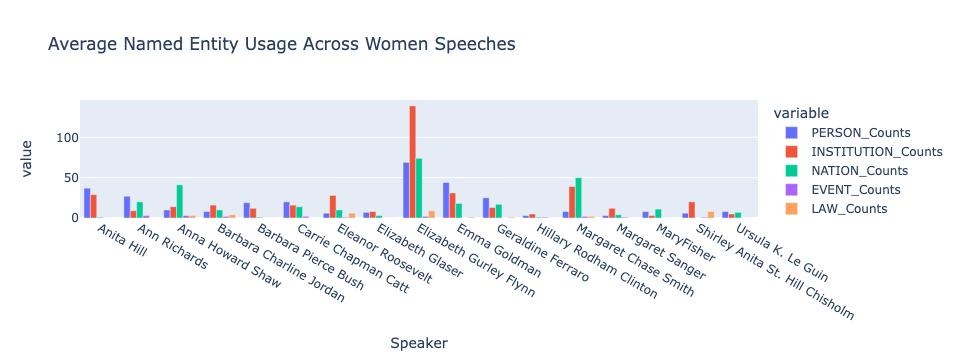

In [136]:
# Calculate average usage of each named entity type
average_ner_df = ner_counts_df.groupby(['Speaker']).mean()
average_ner_df = average_ner_df.round(0)
average_ner_df = average_ner_df.reset_index()
average_ner_df

# Use plotly to plot proper noun use per genre
fig = px.bar(average_ner_df, x="Speaker", y=["PERSON_Counts", 'INSTITUTION_Counts', "NATION_Counts", 'EVENT_Counts', 'LAW_Counts'], title="Average Named Entity Usage Across Women Speeches", barmode='group')
fig.show()

Similar to the POS, when comparing counts of named entities, longer speeches will generally have higher counts simply because they contain more text. However, this does not necessarily reflect the relative importance or emphasis placed on a particular named entity within a speech. Therefore, using ratios instead of counts allows for a more meaningful comparison of the frequency of named entities across speeches. By calculating ratios, we account for the length of each speech and normalize the entity counts accordingly. This allows us to compare the relative prominence of different named entities within each speech. 

In [152]:
# Get the length of speech
speech_lengths = women_speech['Tokens'].apply(len)

# Get the number of each type of entity in each paper
person_counts = ner_analysis_df['Named_Entities'].str.count('PERSON')
institution_counts = ner_analysis_df['Named_Entities'].str.count('ORG')
nation_politic_counts = ner_analysis_df['Named_Entities'].str.count('NORP')
event_counts = ner_analysis_df['Named_Entities'].str.count('EVENT')
law_counts = ner_analysis_df['Named_Entities'].str.count('LAW')

# Calculate entity ratios based on speech length
person_ratios = person_counts / speech_lengths
institution_ratios = institution_counts / speech_lengths
nation_politic_ratios = nation_politic_counts / speech_lengths
event_ratios = event_counts / speech_lengths
law_ratios = law_counts / speech_lengths

# Normalize entity ratios
normalized_person_ratios = person_ratios / person_ratios.max()
normalized_institution_ratios = institution_ratios / institution_ratios.max()
normalized_nation_politic_ratios = nation_politic_ratios / nation_politic_ratios.max()
normalized_event_ratios = event_ratios / event_ratios.max()
normalized_law_ratios = law_ratios / law_ratios.max()

# Append normalized ratios to DataFrame
ner_counts_df['PERSON_Normalized_Ratios'] = normalized_person_ratios
ner_counts_df['INSTITUTION_Normalized_Ratios'] = normalized_institution_ratios
ner_counts_df['NATION_Normalized_Ratios'] = normalized_nation_politic_ratios
ner_counts_df['EVENT_Normalized_Ratios'] = normalized_event_ratios
ner_counts_df['LAW_Normalized_Ratios'] = normalized_law_ratios


# Append named entity counts and ratios to new DataFrame
ner_counts_df = pd.DataFrame()
ner_counts_df['Speaker'] = ner_analysis_df["Speaker"]
ner_counts_df['Year'] = ner_analysis_df["Year"]
ner_counts_df['PERSON_Counts'] = person_counts
ner_counts_df['PERSON_Ratios'] = normalized_person_ratios
ner_counts_df['INSTITUTION_Counts'] = institution_counts
ner_counts_df['INSTITUTION_Ratios'] = normalized_institution_ratios
ner_counts_df['NATION_Counts'] = nation_politic_counts
ner_counts_df['NATION_Ratios'] = normalized_nation_politic_ratios
ner_counts_df['EVENT_Counts'] = event_counts
ner_counts_df['EVENT_Ratios'] = normalized_event_ratios
ner_counts_df['LAW_Counts'] = law_counts
ner_counts_df['LAW_Ratios'] = normalized_law_ratios

ner_counts_df

,Speaker,Year,PERSON_Counts,PERSON_Ratios,INSTITUTION_Counts,INSTITUTION_Ratios,NATION_Counts,NATION_Ratios,EVENT_Counts,EVENT_Ratios,LAW_Counts,LAW_Ratios
0,Barbara Charline Jordan,1976,5,0.169623,11,0.282366,17,0.340379,0,0.000000,0,0.000000
1,Barbara Charline Jordan,1974,12,0.469324,21,0.621461,2,0.046166,3,1.000000,8,0.811304
2,Anna Howard Shaw,1915,10,0.063757,14,0.067540,41,0.154281,3,0.163020,3,0.049597
3,Hillary Rodham Clinton,1995,3,0.078913,5,0.099518,1,0.015525,1,0.224190,0,0.000000
4,Ann Richards,1988,27,0.594202,9,0.149871,20,0.259776,3,0.562703,0,0.000000
5,Margaret Chase Smith,1950,8,0.271095,39,1.000000,50,1.000000,2,0.577629,2,0.175737
6,Barbara Pierce Bush,1990,19,1.000000,12,0.477894,1,0.031063,0,0.000000,0,0.000000
7,MaryFisher,1992,8,0.337367,3,0.095728,11,0.273781,0,0.000000,0,0.000000
8,Eleanor Roosevelt,1948,6,0.097640,36,0.443284,7,0.067231,1,0.138696,2,0.084393
9,Geraldine Ferraro,1984,25,0.920973,13,0.362371,17,0.369619,0,0.000000,1,0.095523


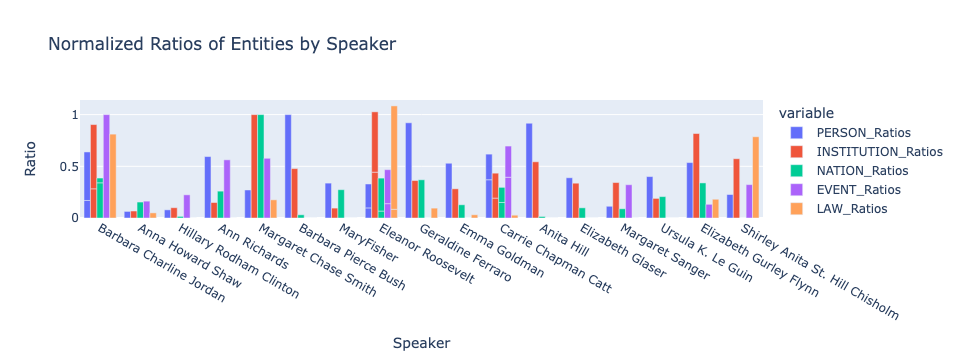

In [153]:
fig = px.bar(ner_counts_df, x='Speaker', y=['PERSON_Ratios', 'INSTITUTION_Ratios', 'NATION_Ratios', 'EVENT_Ratios', 'LAW_Ratios'],
                labels={'Speaker': 'Speaker', 'value': 'Ratio'}, title='Normalized Ratios of Entities by Speaker', barmode='group')
fig.show()

The PERSON and  INSTITUTION entity types were mentioned in most speeches but varied across different speakers. Other entity types also highly mentioned. Speeches by Barbara Charline Jordan have a high emphasis on EVENT entities, highlighting her engagement with significant events. Speeches by Margaret Chase Smith have a high emphasis on NATION entities, suggesting that she might have been discussing topics related to nationalities and political groups. LAW entity mentioned frequently in speeched by Eleanor Roosevelt, Shirley Anita St. Hill Chisholm, and Barbara Charline Jordan, indicating their focus on legal issues. 

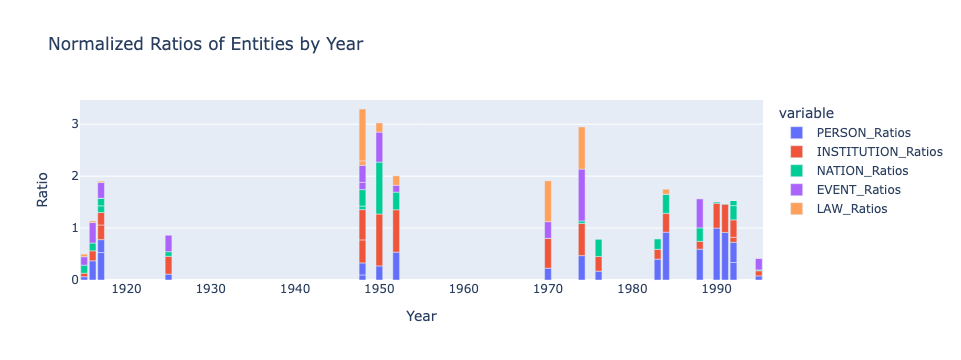

In [139]:
fig = px.bar(ner_counts_df, x='Year', y=['PERSON_Ratios', 'INSTITUTION_Ratios', 'NATION_Ratios', 'EVENT_Ratios', 'LAW_Ratios'],
                labels={'Year': 'Year', 'value': 'Ratio'}, title='Normalized Ratios of Entities by Year')
fig.show()

There has been a shift in the frequency of PERSON entity in speeches over time. While during the beginning of the 20th century, speeches frequently mentioned the entity type PERSON, since 1975, and particularly during the 1990s, the PERSON became the most mentioned. While during the beginning of the 20th century, speeches frequently mentioned the entity type PERSON, since 1975, and particularly during the 1990s, the PERSON became the most mentioned. The mention of NATION being most frequent in during the 1950s suggests that there was a particular focus on national matters during that time period. The 1950s marked a period of significant political changes. It was a time of post-World War II reconstruction and the beginning of the Cold War, which might lead to a greater emphasis on national identity, and political decisions.

### Extract specific named entities 

In [140]:
# Define function to extract words tagged as "PERSON" named entities from doc objects
def extract_person_named_entities(doc):
    return [ent for ent in doc.ents if ent.label_ == 'PERSON']

# Get all PERSON entity words and apply to new column of DataFrame
ner_analysis_df['PERSON_Named_Entities'] = women_speech['Doc'].apply(extract_person_named_entities)


# Make list of PERSON entities a string so we can count their frequencies
ner_analysis_df['PERSON_Named_Entities'] = [', '.join(map(str, l)) for l in ner_analysis_df['PERSON_Named_Entities']]

In [141]:
# Define function to extract words tagged as "NATION" named entities from doc objects
def extract_NATION_named_entities(doc):
    return [ent for ent in doc.ents if ent.label_ == 'NORP']

# Get all NATION entity words and apply to new column of DataFrame
ner_analysis_df['NORP_Named_Entities'] = women_speech['Doc'].apply(extract_NATION_named_entities)


# Make list of NATION entities a string so we can count their frequencies
ner_analysis_df['NORP_Named_Entities'] = [', '.join(map(str, l)) for l in ner_analysis_df['NORP_Named_Entities']]

In [142]:
# Define function to extract words tagged as "EVENT" named entities from doc objects
def extract_event_named_entities(doc):
    return [ent for ent in doc.ents if ent.label_ == 'EVENT']

# Get all EVENT entity words and apply to new column of DataFrame
ner_analysis_df['EVENT_Named_Entities'] = women_speech['Doc'].apply(extract_event_named_entities)


# Make list of EVENT entities a string so we can count their frequencies
ner_analysis_df['EVENT_Named_Entities'] = [', '.join(map(str, l)) for l in ner_analysis_df['EVENT_Named_Entities']]

In [143]:
# Define function to extract words tagged as "LAW" named entities from doc objects
def extract_law_named_entities(doc):
    return [ent for ent in doc.ents if ent.label_ == 'LAW']

# Get all LAW entity words and apply to new column of DataFrame
ner_analysis_df['LAW_Named_Entities'] = women_speech['Doc'].apply(extract_event_named_entities)


# Make list of LAW entities a string so we can count their frequencies
ner_analysis_df['LAW_Named_Entities'] = [', '.join(map(str, l)) for l in ner_analysis_df['LAW_Named_Entities']]

In [144]:
ner_analysis_df.head(2)

,Title,Year,Speaker,Named_Entities,NE_Words,PERSON_Named_Entities,NORP_Named_Entities,EVENT_Named_Entities,LAW_Named_Entities
0,1976 Democratic National Convention Keynote Ad...,1976,Barbara Charline Jordan,CARDINAL NORP NORP DATE TIME TIME PERSON DATE ...,"[(one, hundred, and, fortyfour, years, ago), (...","Barbara Jordan, Idont, Thomas Jefferson, Strik...","Democratic, Democrats, Republicans, Americans,...",,
1,Statement on House Judiciary Proceedings to Im...,1974,Barbara Charline Jordan,PERSON PERSON TIME WORK_OF_ART GPE DATE DATE D...,"[(Mr), (Rangel), (Earlier, today), (Preamble),...","Mr, Rangel, George Washington, Alexander Hamil...","Republican, American","Watergate, Watergate, Watergate","Watergate, Watergate, Watergate"


### ❓What are most common words of specifc named entities mentioned in speeches by certain speakers or years? 

In [145]:
# Search for only PERSON words in Elizabeth Gurley Flynn's speech
person_word_counts_df = ner_analysis_df[(ner_analysis_df == 'Elizabeth Gurley Flynn').any(axis=1)]

# Count the frequency of each word and append to list
person_word_frequencies = person_word_counts_df.PERSON_Named_Entities.str.split(',', expand=True).stack().value_counts()

# Get the most common words and their frequencies
person_word_frequencies.head(10)

 Lane                  2
 Abraham Lincoln       2
 Perry                 2
 Dimitroff             2
 George Dimitroff      2
 Lenin                 2
 Eugene Dennis         2
 famousSchneiderman    1
 Frenchcomrades        1
 St Paul               1
Name: count, dtype: int64

Abraham Lincoln and George Dimitroff were likely significant figures discussed in Elizabeth Gurley Flynn's speech.

In [146]:
# Filter rows that contain the year 1917
year_filtered_df = ner_analysis_df[ner_analysis_df['Year'] == 1917]

# Count the frequency of each word in the filtered data and append to list
person_word_frequencies = year_filtered_df.PERSON_Named_Entities.str.split(',', expand=True).stack().value_counts()

# Get the most common words and their frequencies
person_word_frequencies.head(10)

 Alexander Berkman         6
 Emma Goldman              4
 Shall                     3
 Marshal McCarthy          2
 Ralph Waldo Emerson       2
 Behold                    2
 Jesus Socrates Galileo    1
 John Brown                1
 Havelock Ellis            1
 Niagara                   1
Name: count, dtype: int64

In 1917, these figures were frequently mentioned. Alexander Berkman and Emma Goldman were prominent figures in the anarchist movement, and their ideas and actions gained attention during the early 20th century. Ralph Waldo Emerson was a highly influential writer and philosopher, and his ideas on transcendentalism and individualism had a lasting impact on American thought. His works were widely read and discussed during the 19th and early 20th centuries. Havelock Ellis was a controversial figure in the early 20th century due to his writings on human sexuality and his advocacy for sexual reform. 

In [147]:
# Filter rows that contain the year "1991"
year_filtered_df = ner_analysis_df[ner_analysis_df['Year'] == 1991]

# Count the frequency of each word in the filtered data and append to list
person_word_frequencies = year_filtered_df.PERSON_Named_Entities.str.split(',', expand=True).stack().value_counts()

# Get the most common words and their frequencies
person_word_frequencies.head(10)

 Thomas             14
 Clarence Thomas     6
 Thomass             2
Ms Hill Mr           1
 Thurmond            1
 Susan Cahall        1
 Diane Holt          1
 Allison Duncan      1
 Reagan              1
 Ross                1
Name: count, dtype: int64

In 1991, Clarence Thomas was nominated by President George H. W. Bush to serve as an Associate Justice of the Supreme Court of the United States. However, his confirmation hearings were marred by allegations of sexual harassment made by Anita Hill, a former colleague. Women's speeches during this time may have focused on discussing these allegations, gender dynamics in the workplace, and the importance of addressing sexual harassment.

In [148]:
# Filter rows that contain the year 1948
year_filtered_df = ner_analysis_df[ner_analysis_df['Year'] == 1948]

# Count the frequency of each word in the filtered data and append to list
nation_word_frequencies = year_filtered_df.NORP_Named_Entities.str.split(',', expand=True).stack().value_counts()

# Get the most common words and their frequencies
nation_word_frequencies.head(10)

 Soviet             9
 American           2
 Mans               2
Communist           1
 theUSSR            1
 Communist          1
 thetotalitarian    1
 Russian            1
Soviet              1
 French             1
Name: count, dtype: int64

"Soviet" appears the most frequently, suggesting that Soviet Union was mentioned frequently in the speeches from the year 1948. The words "Communist," "French," "Nazi," and "thetotalitarian" also highly mentioned. This indicates that the year 1948 may have been a significant year in terms of political events related to Soviet Union, communism, and possibly specific countries like France and Germany (as indicated by "French" and "Nazi"). This was also a discussion of totalitarianism. 

In [149]:
# Search for only event words in speeches by Barbara Charline Jordan
event_word_counts_df = ner_analysis_df[(ner_analysis_df == 'Barbara Charline Jordan').any(axis=1)]

# Count the frequency of each word and append to list
event_word_frequencies = event_word_counts_df.EVENT_Named_Entities.str.split(',', expand=True).stack().value_counts()

# Get the most common words and their frequencies
event_word_frequencies.head(10)

 Watergate    2
              1
Watergate     1
Name: count, dtype: int64

Watergate scandal and the Federalist papers were highly mentioned in speeches by Barbara Charline Jordan, indicating that she was actively engaged in discussing these significant political events. The Watergate scandal was a major political event that occurred in the early 1970s, related to President Richard Nixon's resignation. Federalist Papers were also mentioned frequently. These papers shaped the United States Constitution. This indicates that Jordan might used these historical documents to support her arguments.

## Contextual analysis

In [150]:
# Extract the first Doc object
doc = women_speech['Doc'][8]

# Visualize named entity tagging in a single paper
displacy.render(doc, style='ent', jupyter=True)